In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Activation
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.models import Model, Sequential
import datetime
import os
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
x_train = np.expand_dims(x_train,3)
x_test = np.expand_dims(x_test,3)

In [5]:
# TensorBoard
%load_ext tensorboard
logdir = os.path.join("dir" ,datetime.datetime.now().strftime('%d%m%y-%H%M%S'))
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [6]:
# model checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/checkpoints1/model.h5',monitor='val_accuracy',mode='max',save_best_only=True)

In [7]:
# model checkpoint
checkpoint2 = tf.keras.callbacks.ModelCheckpoint(
    '/content/modelAtEveryEpoch/model-{epoch:02d}-{val_loss:.2f}.h5',verbose = 1
    )

In [8]:
#early stopping
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',patience=3,restore_best_weights=True,verbose=1)

In [9]:
# csv logger
csvLogger = tf.keras.callbacks.CSVLogger('/content/training.csv')

In [32]:
class customCallback(tf.keras.callbacks.Callback):
  def __init__(self, endAt, changeLrAt):
    super(customCallback, self).__init__()
    self.endAt = endAt
    self.changeLrAt = changeLrAt
  def on_epoch_end(self, epochs, logs = None):
    if self.endAt == epochs:
      self.model.stop_training = False
    if self.changeLrAt == epochs:
      self.model.optimizer.learning_rate = self.model.optimizer.learning_rate / 10
    # print("on epoch end")
  def on_epoch_begin(self, epochs, logs = None):
    # print('on epoch begin')
    print('learning rate: ',self.model.optimizer.learning_rate)
  
customCallback = customCallback(10, 5)
  

In [83]:
def displayImages(images, pred,yTrue):
  n = pred.shape[0]
  plt.figure(figsize=(n * 1.5, 2))
  plt.box(None)
  plt.yticks([])
  plt.xticks([images.shape[0] * i + images.shape[0] / 2 for i in range(n)], [pred[i] for i in range(n)])
  for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
    if (pred[i] != yTrue[i]):
      t.set_color('red')
      print("here")
  plt.imshow(images, cmap = 'gray_r')
  plt.show()

In [84]:
class visualizeAferEpochs(tf.keras.callbacks.Callback):
  def __init__(self, x, yTrue, noOfSamples = 10):
    super(visualizeAferEpochs, self).__init__()
    randomIndexes = np.random.choice(x.shape[0], noOfSamples)
    images = x[randomIndexes]
    self.x = images
    images = np.squeeze(images)
    images = np.swapaxes(images, 0 , 1)
    images = np.reshape(images,(images.shape[0],images.shape[1] * images.shape[2]))
    self.images = images
    self.yTrue = yTrue[randomIndexes]
    

  def on_epoch_end(self, epochs, logs = None):
    pred = self.model.predict(self.x)
    pred = np.argmax(pred, axis = 1)
    # print(pred)
    displayImages(self.images, pred, self.yTrue)
visualizeAferEpochs = visualizeAferEpochs(x_test, y_test)

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.5878 - accuracy: 0.8447 - val_loss: 0.6228 - val_accuracy: 0.8288
here
here


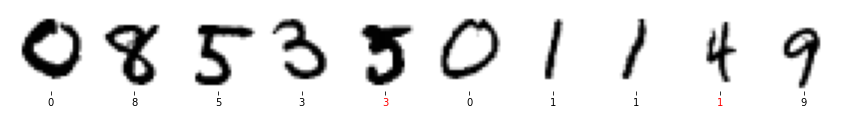

Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1424 - accuracy: 0.9646 - val_loss: 0.1061 - val_accuracy: 0.9738
here


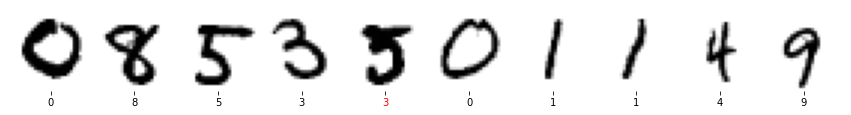

Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1044 - accuracy: 0.9727 - val_loss: 0.0894 - val_accuracy: 0.9771
here


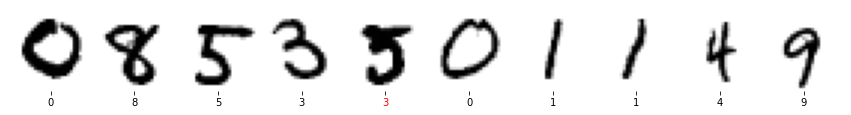

Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0836 - accuracy: 0.9788 - val_loss: 0.0791 - val_accuracy: 0.9787
here


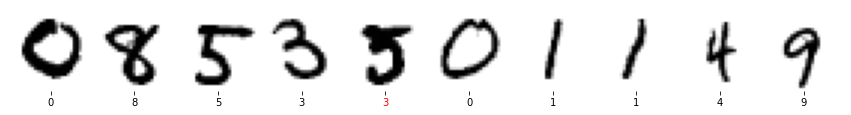

Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0726 - accuracy: 0.9807 - val_loss: 0.0748 - val_accuracy: 0.9804


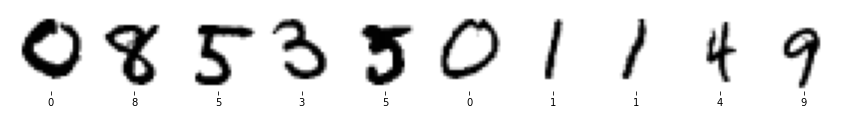

Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0632 - accuracy: 0.9840 - val_loss: 0.0700 - val_accuracy: 0.9814
here


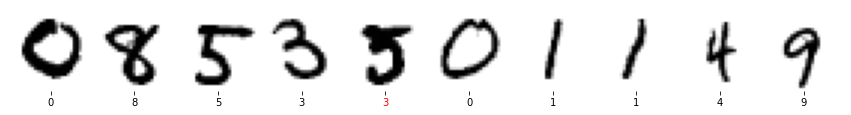

Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0572 - accuracy: 0.9854 - val_loss: 0.0668 - val_accuracy: 0.9816
here


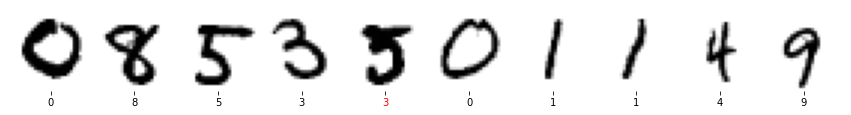

Epoch 8/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0526 - accuracy: 0.9868 - val_loss: 0.0612 - val_accuracy: 0.9824


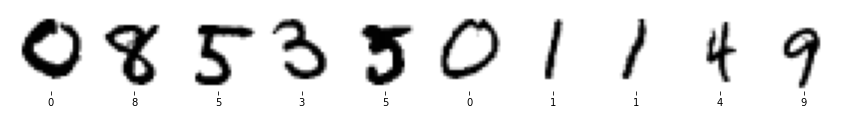

Epoch 9/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0463 - accuracy: 0.9889 - val_loss: 0.0601 - val_accuracy: 0.9830
here


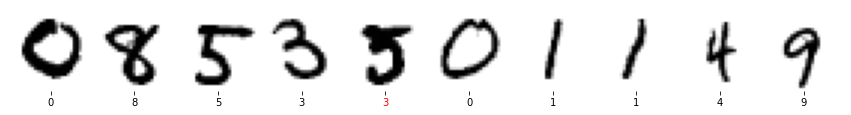

Epoch 10/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0447 - accuracy: 0.9892 - val_loss: 0.0590 - val_accuracy: 0.9838


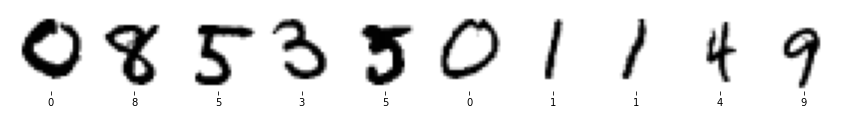

Epoch 11/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0385 - accuracy: 0.9917 - val_loss: 0.0576 - val_accuracy: 0.9839


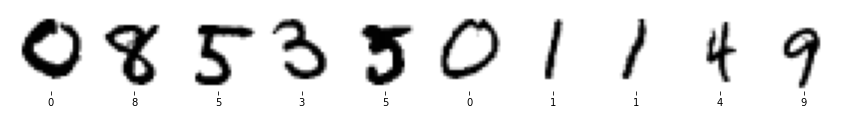

Epoch 12/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0380 - accuracy: 0.9918 - val_loss: 0.0540 - val_accuracy: 0.9846


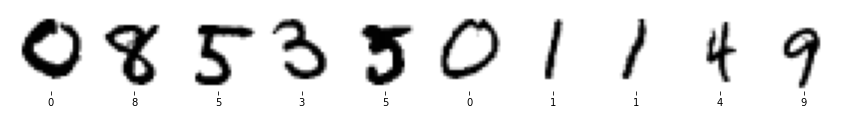

Epoch 13/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0338 - accuracy: 0.9924 - val_loss: 0.0568 - val_accuracy: 0.9836


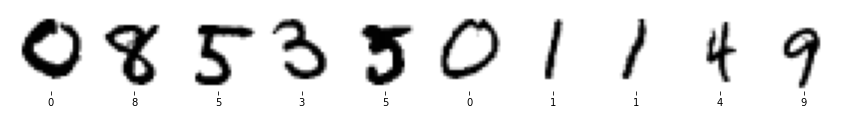

Epoch 14/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0324 - accuracy: 0.9929 - val_loss: 0.0537 - val_accuracy: 0.9841


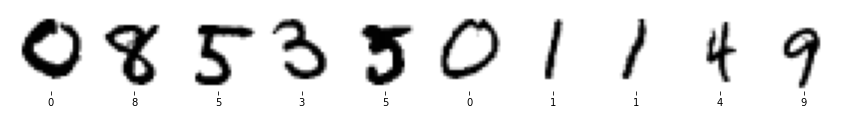

Epoch 15/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0303 - accuracy: 0.9931 - val_loss: 0.0505 - val_accuracy: 0.9852


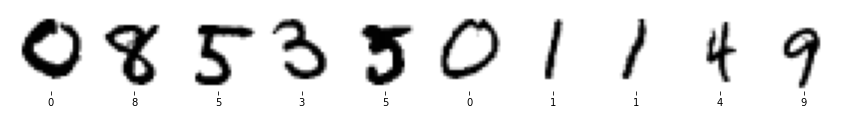

In [85]:
callbacks = [tensorboard,checkpoint,checkpoint2,earlyStopping,csvLogger, customCallback]
callbacks = [visualizeAferEpochs]
model = Sequential([
                    Conv2D(32,3,input_shape=(28,28,1)),
                    BatchNormalization(),
                    Activation('relu'),
                    MaxPooling2D(),
                    Conv2D(64,3,input_shape=(28,28,1)),
                    BatchNormalization(),
                    Activation('relu'),
                    MaxPooling2D(),
                    Conv2D(128,3,input_shape=(28,28,1)),
                    BatchNormalization(),
                    Activation('relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(10,activation='softmax')
])
model.compile(optimizer='sgd',loss = 'sparse_categorical_crossentropy',metrics='accuracy')
model.fit(x = x_train,y=y_train,batch_size=128,epochs=15,validation_data=(x_test,y_test),
          callbacks=callbacks)

In [ ]:
%tensorboard --logdir dir

In [12]:
model2 = tf.keras.models.load_model('/content/checkpoints1/model.h5')

In [13]:
model2.evaluate(x = x_test, y = y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0479 - accuracy: 0.9871


[0.04793623462319374, 0.9871000051498413]

In [60]:
fig = plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>